load dataset and separate the dataset

In [ ]:
import pandas as pd

data = pd.read_csv('fyp_dataset.csv')

y = data.pop('label').values
data.pop('id').values

X = data.values

### Feature Selection

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score

In [4]:
temp_list = []
llist = []
mi = dict()
for i in range(5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=1/5)
    i_scores = mutual_info_classif(X_train, y_train)
    temp_list.append(i_scores)

for a in range(len(data.columns)):
    value=0
    for b in range(5):
        
        value+=temp_list[b][a]
    llist.append(value/5)
    
for i,j in zip(data.columns,llist):
    mi[i]=j
    
df = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df#.head(10)

,I-Gain
tweets,0.243081
url_count,0.202153
likes_received,0.200448
mentions_count,0.198707
following,0.177914
followers,0.177871
likes_given,0.167732
retweets_count,0.167630
Twitter for Web Client,0.160805
lexical_diversity,0.144178


normalise I-Gain weights

In [65]:
account = df['I-Gain'].iloc[16] + df['I-Gain'].iloc[12] + df['I-Gain'].iloc[0] + df['I-Gain'].iloc[19] 
tweet_text = df['I-Gain'].iloc[14] + df['I-Gain'].iloc[19] + df['I-Gain'].iloc[17] + df['I-Gain'].iloc[9] 
activity = df['I-Gain'].iloc[5] + df['I-Gain'].iloc[4] + df['I-Gain'].iloc[6] + df['I-Gain'].iloc[2] 
interactions = df['I-Gain'].iloc[11] + df['I-Gain'].iloc[3] + df['I-Gain'].iloc[7] + df['I-Gain'].iloc[1] 
tweet_source = df['I-Gain'].iloc[10] + df['I-Gain'].iloc[22] + df['I-Gain'].iloc[18] + df['I-Gain'].iloc[15] + df['I-Gain'].iloc[8] + df['I-Gain'].iloc[13] + df['I-Gain'].iloc[21] 

total = account + tweet_text + activity + interactions + tweet_source

weights = [
    round(account/total, 3)
    ,round(tweet_text/total, 3)
    ,round(activity/total, 3)
    ,round(interactions/total, 3)
    ,round(tweet_source/total, 3)
]

weights



[0.192, 0.044, 0.403, 0.361]

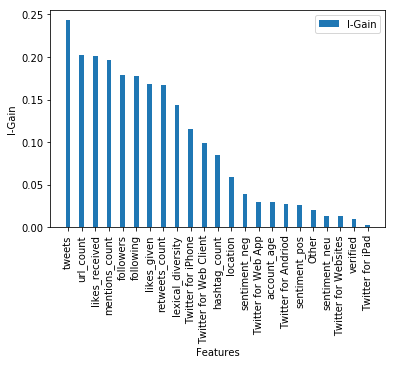

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax.bar(df.index, df["I-Gain"], label='I-Gain',width=.35)
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax.legend()


plt.savefig('features.png', bbox_inches = 'tight')
plt.show()

In [5]:
import joblib

ensemble_clf = joblib.load("joblib//ensemble_classifier.sav")

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, cross_validate

scoring = {'roc_auc': 'roc_auc'}

data = pd.read_csv('fyp_dataset.csv')

#data.pop('tweets')
#data.pop('url_count')
#data.pop('likes_received')
#data.pop('mentions_count')
#data.pop('following')
#data.pop('followers')
#data.pop('likes_given')
#data.pop('retweets_count')
#data.pop('Twitter for Web Client')
#data.pop('lexical_diversity')
#data.pop('Twitter for iPhone')
#data.pop('hashtag_count')
#data.pop('location')
#data.pop('Other')
#data.pop('sentiment_neg')
#data.pop('Twitter for Web App')
#data.pop('account_age')
#data.pop('sentiment_pos')
#data.pop('Twitter for Andriod')
#data.pop('sentiment_neu')
#data.pop('Twitter for Websites')
#data.pop('verified')
#data.pop('Twitter for iPad')

data.pop('id')

y = data.pop('label').values
X = data.values


cross_val_scores = cross_validate(ensemble_clf, X, y, cv=5, scoring = scoring)
print(cross_val_scores['test_roc_auc'].mean())

0.9362649289542422


In [47]:
df['AUC'] = AUC

In [46]:
AUC = [0.815189431026268
       , 0.867342587043885
       , 0.8939568648319491
       , 0.908969898785756
       , 0.9140227668188381
       , 0.9190478327858755
       , 0.9246037384520992
       , 0.9274293901616893
       , 0.9275649178956107
       , 0.9288211292528727
       , 0.9311936959771174
       , 0.9324226383673588
       , 0.9328573044641173
       , 0.9350379872719434
       , 0.9362774393286507
       , 0.9360833595519683
       , 0.9370734767528367
       , 0.9369819820463038
       , 0.9368330586128097
       , 0.9363964489258609
       , 0.9362568943903862
       , 0.9361588200360826
       , 0.9362649289542422
      ]


,I-Gain,AUC
tweets,0.243081,0.815189
url_count,0.202153,0.867343
likes_received,0.200448,0.893957
mentions_count,0.198707,0.908970
following,0.177914,0.914023


In [63]:
acc_scores = []
temp_scores = []

for kk in range(1, X_train.shape[1]+1):
    
    temp_scores = []
    
    #mimics four-fold cross validation
    for i in range(4):
        FS_trans = SelectKBest(mutual_info_classif, k=kk).fit(X_train, y_train)
        X_tR_new = FS_trans.transform(X_train)
        X_tS_new = FS_trans.transform(X_test)
        seg_NB = ensemble_clf.fit(X_tR_new, y_train)
        y_dash = seg_NB.predict(X_tS_new)
        acc = accuracy_score(y_test, y_dash)
        temp_scores.append(acc)
        
    
    four_fold_val = sum(temp_scores)/len(temp_scores)
    acc_scores.append(four_fold_val)
    
df['Accuracy'] = acc_scores
df.head(5)

C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs 

C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs 

,I-Gain,Accuracy
tweets,0.243708,0.709377
likes_received,0.206313,0.799628
url_count,0.201023,0.821946
mentions_count,0.198212,0.835650
sentiment_neu,0.197414,0.845928


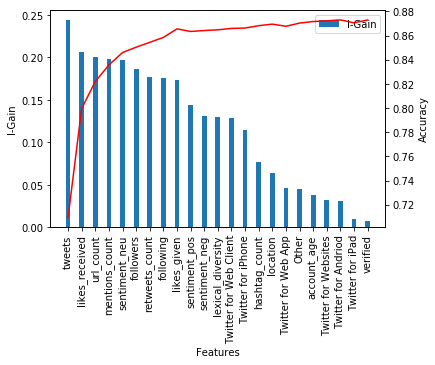

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["I-Gain"], label='I-Gain',width=.35)
ax2.plot(df["Accuracy"], color='red', label='Accuracy')
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Accuracy')
ax.legend()


plt.savefig('gainAccuracy.png', bbox_inches = 'tight')
plt.show()

### ROC

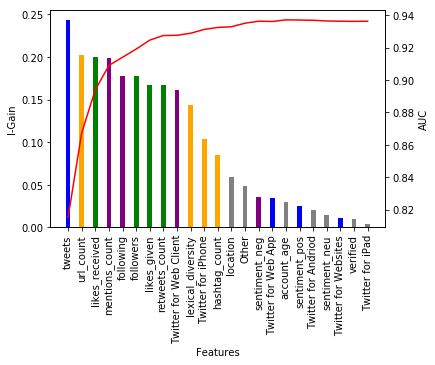

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

colors=['blue'     
        ,'orange'  
        ,'green'   
        ,'purple'  
        ,'purple'  
        ,'green'   
        ,'green'  
        ,'green'  
        ,'purple'   
        ,'orange'   
        ,'orange'  
        ,'orange'  
        ,'grey'    
        ,'grey'    
        ,'purple'    
        ,'blue' 
        ,'grey'   
        ,'blue'   
        ,'grey'  
        ,'grey'  
        ,'blue'    
        ,'grey'    
        ,'grey']   

n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["I-Gain"], label='I-Gain',width=.35, color=colors)
ax2.plot(df["AUC"], color='red', label='AUC')
ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('AUC')
#ax.legend()
#ax.legend(['first', 'second'])


plt.savefig('all_features_auc.png', bbox_inches = 'tight')#-------------------------------------------------
plt.show()